# Importing the libraries

In [147]:
from itertools import combinations_with_replacement
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Chosen Numbers for Binary Classification

In [148]:
chosen_number = 1

# Training and Test Sets Data Path

In [149]:
train_data_path = 'DigitsTraining.csv'
test_data_path = 'DigitsTesting.csv'

# Importing the dataset

In [150]:
digits_training_df = pd.read_csv(train_data_path, header=None)
digits_testing_df = pd.read_csv(test_data_path, header=None)

# Remove the Dependent Variable from Train and Test Data

In [151]:
train_data = digits_training_df.iloc[:, 1:]
test_data = digits_testing_df.iloc[:, 1:]

In [152]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,1.0,1.0,1.0,1.0000,1.0000,1.0000,1.0000,0.8155,0.0690,0.5835,...,0.3480,0.0885,0.0000,0.2590,0.7370,0.9955,1.0000,1.0000,1.000,1.0
1,1.0,1.0,1.0,0.9065,0.8355,0.9045,0.9435,0.8355,0.9265,1.0000,...,0.8355,0.8355,0.5165,0.1195,0.1190,0.4370,0.5475,0.8355,0.914,1.0
2,1.0,1.0,1.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9980,...,1.0000,1.0000,1.0000,0.5545,0.0000,0.5895,1.0000,1.0000,1.000,1.0
3,1.0,1.0,1.0,1.0000,1.0000,0.6365,0.1580,0.0200,0.2750,0.5335,...,0.6590,0.0000,0.2320,0.9935,1.0000,1.0000,1.0000,1.0000,1.000,1.0
4,1.0,1.0,1.0,1.0000,1.0000,0.9640,0.6020,0.1245,0.2670,0.3830,...,0.2670,0.1805,0.0000,0.0000,0.1045,0.2805,0.5995,0.9415,1.000,1.0


In [153]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
0,1.0,1.0,1.0,1.0000,1.00,0.974,0.7805,0.426,0.308,0.0480,...,1.0000,0.9540,0.2850,0.189,0.9865,1.0000,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0000,1.00,1.000,1.0000,1.000,1.000,1.0000,...,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,0.7965,0.15,0.000,0.0000,0.000,0.000,0.0735,...,0.0000,0.1415,0.3335,0.419,0.6965,1.0000,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0000,1.00,1.000,1.0000,1.000,1.000,1.0000,...,1.0000,1.0000,1.0000,1.000,1.0000,1.0000,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0000,1.00,1.000,1.0000,0.929,0.553,0.0990,...,0.0495,0.0495,0.0495,0.355,0.6845,0.9335,1.0,1.0,1.0,1.0


# Extract Features from The Images: Average Intensity and Symmetry

In [154]:
def extract_features(image_row):
    # Get the image (16x16)
    image = image_row.values.reshape(16, 16)

    # Average intensity
    avg_intensity = np.mean(image)
    
    # Vertical symmetry
    vertical_flipped_image = np.flipud(image)
    
    Sv = np.sum(np.abs(image - vertical_flipped_image)) / 256
    
    # Horizontal symmetry
    horizontal_flipped_image = np.fliplr(image)
    Sh = np.sum(np.abs(image - horizontal_flipped_image)) / 256
    
    # Overall symmetry
    symmetry = (Sh + Sv) / 2
    
    return np.array([avg_intensity, symmetry])

# Prepare training and testing features

In [155]:
X_train = np.array([extract_features(row) for _, row in train_data.iterrows()])
# Binary classification to distinguish the chosen number from other numbers
y_train = np.where(digits_training_df.iloc[:, 0] == chosen_number, 1, -1) 

X_test = np.array([extract_features(row) for _, row in test_data.iterrows()])
# Binary classification to distinguish the chosen number from other numbers
y_test = np.where(digits_testing_df.iloc[:, 0] == chosen_number, 1, -1)  

In [156]:
X_train

array([[0.6589082 , 0.28305859],
       [0.55586914, 0.34355078],
       [0.76899805, 0.18042188],
       ...,
       [0.60629492, 0.18257422],
       [0.40241016, 0.14112891],
       [0.7237793 , 0.05726563]])

In [157]:
y_train

array([-1, -1, -1, ..., -1, -1,  1])

In [158]:
X_test

array([[0.72782227, 0.30299609],
       [0.73486719, 0.318875  ],
       [0.66407422, 0.18259766],
       ...,
       [0.69114258, 0.33532422],
       [0.4900293 , 0.125625  ],
       [0.81102344, 0.04883203]])

In [159]:
y_test

array([-1, -1, -1, ..., -1, -1,  1])

# Training the Polynomial Regression (from scratch) model on the Training set

# Function to create polynomial features

In [160]:
def create_polynomial_features(x, degree):
    m, n = x.shape
    poly_features = np.ones((m, 1))
    # Generate all combinations of features up to the specified degree
    for d in range(1, degree + 1):
        for indices in combinations_with_replacement(range(n), d):
            feature = np.prod(x[:, indices], axis=1).reshape(-1, 1)
            poly_features = np.hstack((poly_features, feature))
    return poly_features

In [161]:
def fit_polynomial(_x_train, _y_train, _learning_rate, epsilon, degree):
    # Generate polynomial features
    _x_train = create_polynomial_features(_x_train, degree)
    
    # Initialize weights
    weights = np.ones(_x_train.shape[1])
    
    norma = float('inf')
    while norma > epsilon:
        # Compute predictions (vectorized)
        y_pred = _x_train @ weights
        
        # Calculate gradient (vectorized)
        error = y_pred - _y_train
        gradient = _x_train.T @ error
        
        # Calculate the L2 norm of the gradient
        norma = np.linalg.norm(gradient)
         # Update weights
        weights -= _learning_rate * gradient
        
        if np.isnan(norma):
            print("The model diverged!")
            break
    
    return weights

def predict_polynomial(weights, x_values, degree):
    # Generate polynomial features
    x_values = create_polynomial_features(x_values, degree)
    # Compute predictions (vectorized)
    predictions = x_values @ weights
    
    return predictions


degree = 3
learning_rate = 0.0001
e = 0.5
regressor_weights = fit_polynomial(X_train, y_train, learning_rate, e, degree)

# Predicting the Test set results

In [162]:
y_train_pred = predict_polynomial(regressor_weights, X_train, degree)
y_test_pred = predict_polynomial(regressor_weights, X_test, degree)

# Converting predictions to binary classification (-1 or 1)
y_train_pred_class = np.where(y_train_pred >= 0, 1, -1)
y_test_pred_class = np.where(y_test_pred >= 0, 1, -1)


In [163]:
y_test_pred_class

array([-1, -1, -1, ..., -1, -1,  1])

In [164]:
y_test

array([-1, -1, -1, ..., -1, -1,  1])

# Calculate Ein (In-sample error) and Eout (Out-of-sample error)

In [165]:
Ein = np.mean(y_train_pred_class != y_train)
Eout = np.mean(y_test_pred_class != y_test)

In [166]:
Ein

0.013029762721163077

In [167]:
Eout

0.01943198804185351

# Visualising the Training set results

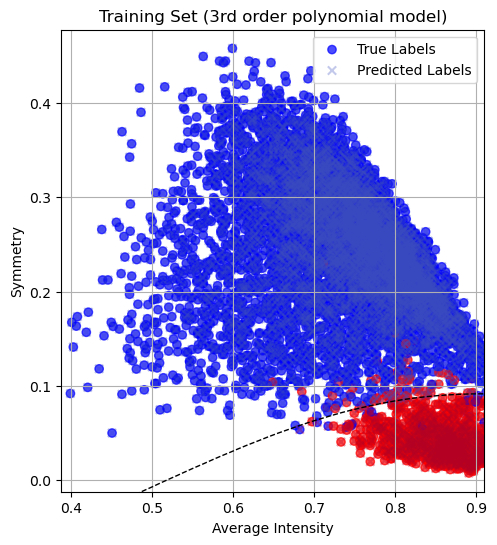

In [168]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid to pass into the model
grid_points = np.c_[xx.ravel(), yy.ravel()]


# Predict the y values for the grid
Z = predict_polynomial(regressor_weights, grid_points, degree)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Training set visualization
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', alpha=0.7, label='True Labels')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred_class, cmap='coolwarm', alpha=0.3, marker='x', label='Predicted Labels')

# Plot the regression contours
contour = plt.contour(xx, yy, Z, levels=15, linewidths=1, colors='black', linestyles='--')
plt.clabel(contour, inline=True, fontsize=8)

x_margin = (x_max - x_min) * 0.40
y_margin = (y_max - y_min) * 0.40
plt.xlim(x_min + x_margin, x_max - x_margin)
plt.ylim(y_min + y_margin, y_max - y_margin)

plt.title('Training Set (3rd order polynomial model)')
plt.xlabel('Average Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.grid(True)

plt.show()

# Visualising the Test set results

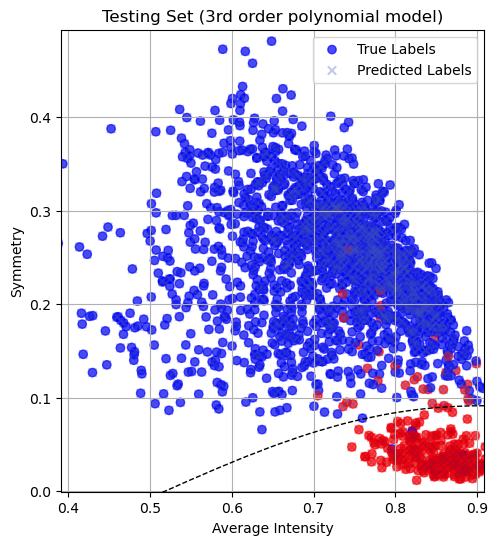

In [169]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Flatten the grid to pass into the model
grid_points = np.c_[xx.ravel(), yy.ravel()]


# Predict the y values for the grid
Z = predict_polynomial(regressor_weights, grid_points, degree)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(12, 6))

# Training set visualization
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', alpha=0.7, label='True Labels')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred_class, cmap='coolwarm', alpha=0.3, marker='x', label='Predicted Labels')

# Plot the regression contours
contour = plt.contour(xx, yy, Z, levels=1, linewidths=1, colors='black', linestyles='--')
plt.clabel(contour, inline=True, fontsize=8)


x_margin = (x_max - x_min) * 0.40
y_margin = (y_max - y_min) * 0.40
plt.xlim(x_min + x_margin, x_max - x_margin)
plt.ylim(y_min + y_margin, y_max - y_margin)

plt.title('Testing Set (3rd order polynomial model)')
plt.xlabel('Average Intensity')
plt.ylabel('Symmetry')
plt.legend()
plt.grid(True)


plt.show()